# YOLOv8 for Sign Language Detection

## Libraries

In [1]:
!pip install ultralytics
import ultralytics
import torch
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
import os
from PIL import Image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

## Dataset from Roboflow

In [2]:
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="hTJfCFpzTnMqVK7IIwFq")
project = rf.workspace("signlanguage-s4ip0").project("sign_language_letters-u5kdy")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.42, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Sign_language_letters-2 in yolov8:: 100%|██████████| 2680/2680 [00:00<00:00, 6298.50it/s]


## Data Visualization

In [4]:
# Utility function for plot images
def plot_image(title, image_path):

  # Check if the file exists
  if os.path.exists(image_path):
      # Load image
      img = Image.open(image_path)
      # Set figsize
      plt.figure(figsize=(12, 12))
      # Show the image
      plt.imshow(img)
      plt.axis('off')  # remove axis
      plt.title( title, fontsize=20)
      plt.show()
  else:
      print(f"Immagine not found: {image_path}")


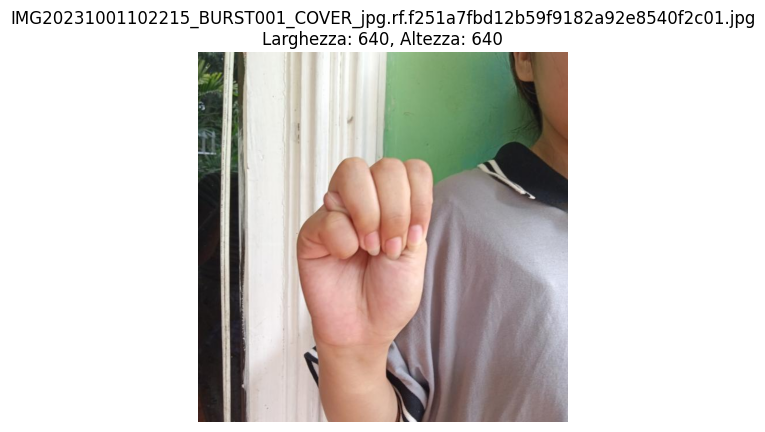

In [8]:
# CHECK IMAGE DIMENSION

# Specifica il nome del file dell'immagine di cui vuoi conoscere la dimensione
image_file = 'IMG20231001102215_BURST001_COVER_jpg.rf.f251a7fbd12b59f9182a92e8540f2c01.jpg'

# Image Path
image_path = os.path.join('/content/Sign_language_letters-2/train/images', image_file)

# Check if the file exists
if os.path.exists(image_path):
    # Open Image
    with Image.open(image_path) as img:
        # Get Image Dimensions
        width, height = img.size

        # Show Image
        plt.imshow(img)
        # Print Dimensions
        plt.title(f'{image_file}\n Width: {width}, Height: {height}')
        plt.axis('off')
        plt.show()

else:
    print(f"Immagine '{image_file}' not found.")

In [9]:
%cat /content/Sign_language_letters-2/data.yaml

names:
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
nc: 26
roboflow:
  license: CC BY 4.0
  project: sign_language_letters-u5kdy
  url: https://universe.roboflow.com/signlanguage-s4ip0/sign_language_letters-u5kdy/dataset/2
  version: 2
  workspace: signlanguage-s4ip0
test: /content/Sign_language_letters-2/test/images
train: /content/Sign_language_letters-2/train/images
val: /content/Sign_language_letters-2/valid/images


In [ ]:
# VISUALIZING CLASS DISTRIBUTION

import os
from collections import Counter
import matplotlib.pyplot as plt

# Labels Path
labels_path = '/content/Sign_language_letters-2/train/labels'

# Classes Counter
label_counter = Counter()

# Scroll through all the .txt files in the labels folder
for label_file in os.listdir(labels_path):
    if label_file.endswith('.txt'):
        file_path = os.path.join(labels_path, label_file)
        with open(file_path, 'r') as file:
            # Reading each row
            for line in file:
                # Extracting First column
                label = int(line.split()[0])
                # Increasing the classes counter
                label_counter[label] += 1

# converting numbers labels to letters
letters = [chr(i + 65) for i in range(26)]
counts = [label_counter[i] for i in range(26)]

# Defining colors list
colors = plt.cm.tab20.colors
colors = colors[:26]

# Creating Histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(letters, counts, color=colors)
plt.xlabel('Letters')
plt.ylabel('Number of images')
plt.title('Distribution of images by class (ASL)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting Histogram
plt.show()


## Fine-Tuning Yolov8 on ASL Dataset

- Batch size: 8
- Optimizer: Adam
- Learning Rate: 0.001
- Epochs: 45

In [10]:
%cd /content

!yolo task=detect mode=train model=yolov8s.pt data=/content/Sign_language_letters-2/data.yaml epochs=45 batch=8 imgsz=640  pretrained=True optimizer=Adam lr0=0.001  plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 194MB/s]
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Sign_language_letters-2/data.yaml, epochs=45, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

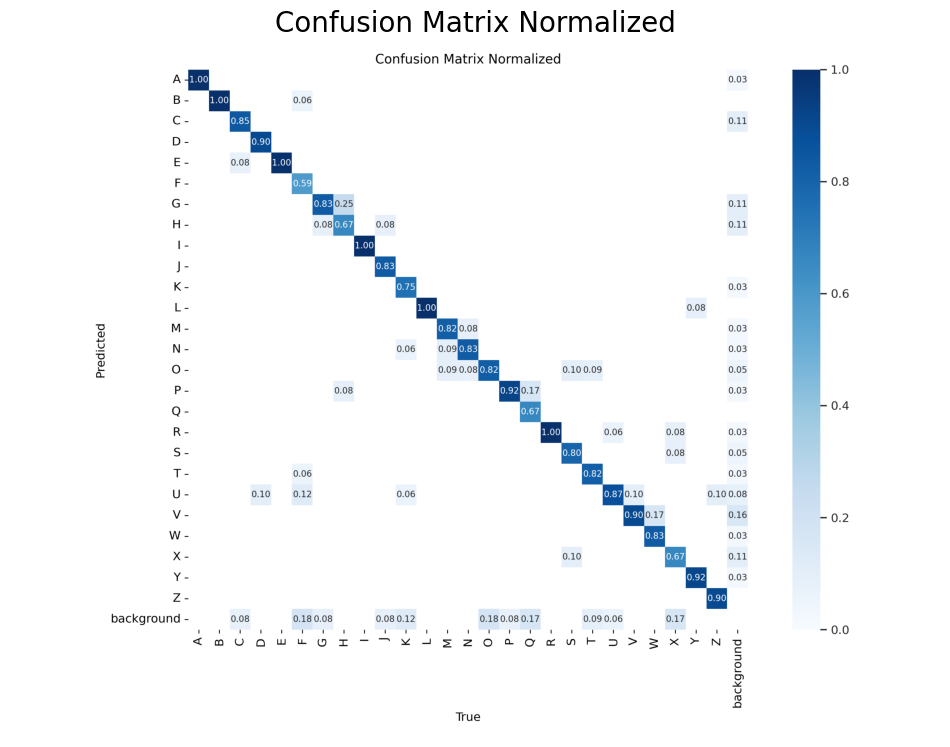

In [11]:
# Path to normalized confusion matrix
image_path = '/content/runs/detect/train/confusion_matrix_normalized.png'
title='Confusion Matrix Normalized'

plot_image(title, image_path)

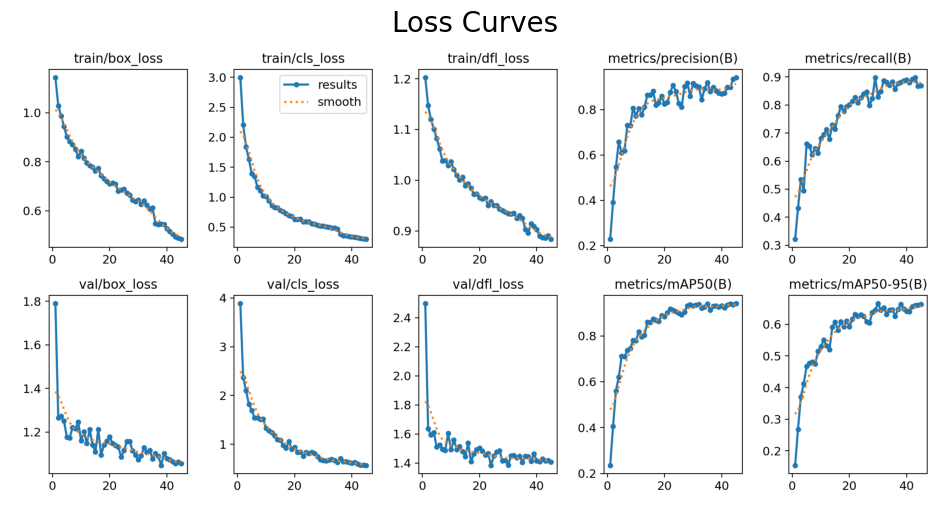

In [12]:
# Loss's Curves Plotting
image_path = '/content/runs/detect/train/results.png'
title='Loss Curves'

plot_image(title, image_path)

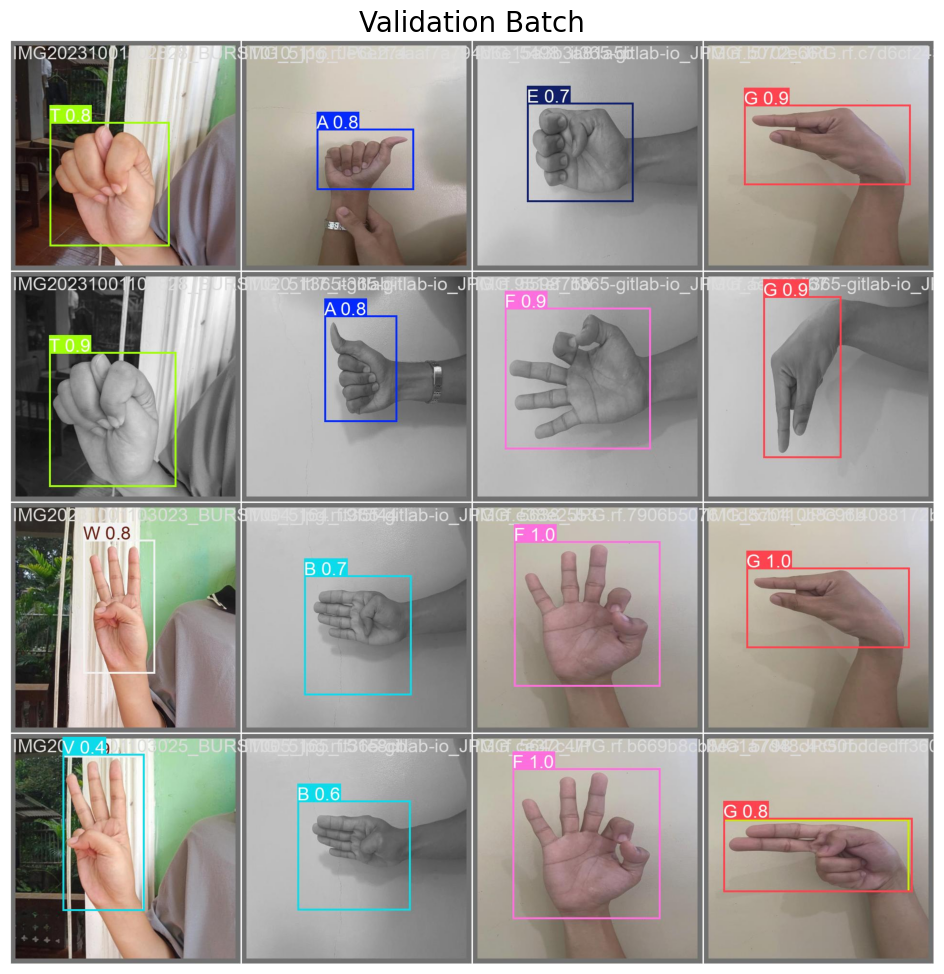

In [15]:
# Validation Batch Plotting
image_path = '/content/runs/detect/train/val_batch1_pred.jpg'

title='Validation Batch'

plot_image(title, image_path)

## Testing

In [16]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_image_collage(images_path):
    # Path to Image Directory
    image_files = os.listdir(images_path)

    # Selecting 6 random Images
    image_files = [f for f in image_files if f.endswith('.jpg') or f.endswith('.png')]
    selected_files = random.sample(image_files, 6)

    # Creating a 2x3 subplot
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))

    for i, file_name in enumerate(selected_files):
        # Loading Image
        img = Image.open(os.path.join(images_path, file_name))

        # Resizing image for 2x3 plotting
        img.thumbnail((int(fig.bbox.width / 3), int(fig.bbox.height / 2)))

        # Calculating the coordinates of the grid cell
        row = i // 3
        col = i % 3

        # Show image in the correct cell of grid
        axs[row, col].imshow(img)
        axs[row, col].axis('off')

    plt.tight_layout()
    plt.show()


In [24]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt  conf=0.1 source=/content/Sign_language_letters-2/test/images


Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs

image 1/42 /content/Sign_language_letters-2/test/images/2e7b8598-a7a9-4702-b0cd-adf9aedb191c_jpeg_jpg.rf.939a302491493734fdcff02122b93520.jpg: 640x640 1 A, 1 B, 1 C, 1 D, 1 E, 1 F, 3 Gs, 2 Hs, 1 I, 1 L, 1 M, 1 N, 1 O, 1 P, 2 Rs, 2 Ss, 1 T, 1 U, 2 Vs, 3 Ws, 1 X, 1 Y, 1 Z, 17.8ms
image 2/42 /content/Sign_language_letters-2/test/images/IMG20230919110314_BURST001_COVER_jpg.rf.599621b0c5d1ec5da9e04f9086a9c356.jpg: 640x640 1 K, 1 U, 16.4ms
image 3/42 /content/Sign_language_letters-2/test/images/IMG20230919110314_BURST020_jpg.rf.f0a2e9860a24fe8ced74efe1b7eb0896.jpg: 640x640 1 K, 1 U, 16.4ms
image 4/42 /content/Sign_language_letters-2/test/images/IMG20230919110619_BURST001_COVER_jpg.rf.a175936bf9b01d4684e48be8029bc8bb.jpg: 640x640 1 J, 1 Y, 16.3ms
image 5/42 /content/Sign_language_letters-2/test/images/IMG20230919113232_BURST00

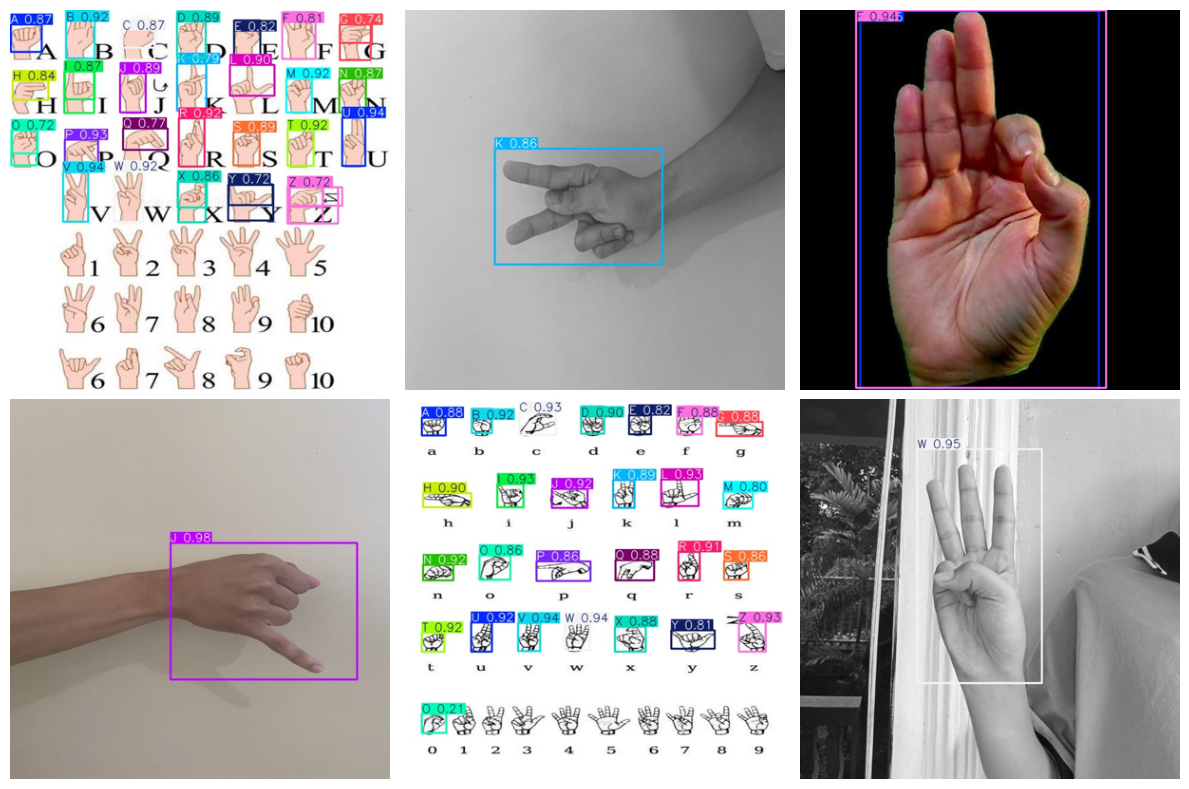

In [27]:
# Showing Predictions on Test Images
plot_image_collage('/content/runs/detect/predict2')
